<a href="https://colab.research.google.com/github/bunteess/Decline-curve-Analysis/blob/main/Audio_files_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

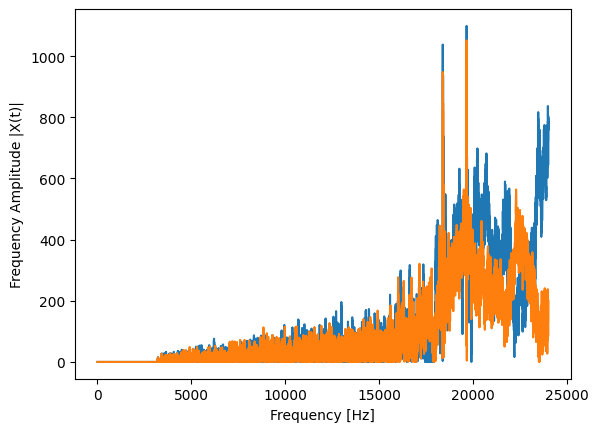

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy.io import wavfile

sample_rate, audio_time_series = wavfile.read('/content/drive/MyDrive/Colab Notebooks/A2-604/Bells2-3.wav')
single_sample_data = audio_time_series[:sample_rate]

def fft_plot(audio, sample_rate):
  N = len(audio)    # Number of samples
  T = 1/sample_rate # Period
  y_freq = fft(audio)
  domain = len(y_freq) // 2
  x_freq = np.linspace(0, sample_rate//2, N//2)
  plt.plot(x_freq, abs(y_freq[:domain]))
  plt.xlabel("Frequency [Hz]")
  plt.ylabel("Frequency Amplitude |X(t)|")
  return plt.show()

fft_plot(single_sample_data, sample_rate)

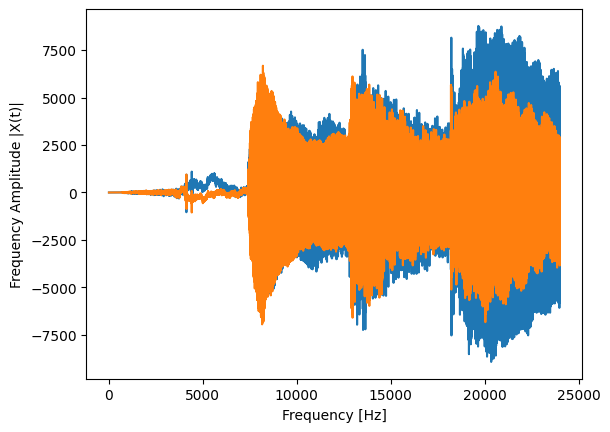

In [34]:
...
sample_rate, audio_time_series = wavfile.read('/content/drive/MyDrive/Colab Notebooks/A2-604/Bells2-3.wav')
single_sample_data = audio_time_series[:sample_rate]

def fft_plot(audio, sample_rate):
  N = len(audio)    # Number of samples
  y_freq = fft(audio)
  domain = len(y_freq) // 2
  x_freq = np.linspace(0, sample_rate//2, N//2)
  # Changed from abs(y_freq[:domain]) -> y_freq[:domain]
  plt.plot(x_freq, y_freq[:domain])
  plt.xlabel("Frequency [Hz]")
  plt.ylabel("Frequency Amplitude |X(t)|")
  return plt.show()

# Changed from single_sample_data -> audio_time_series
fft_plot(audio_time_series, sample_rate)


0.009907636725358309


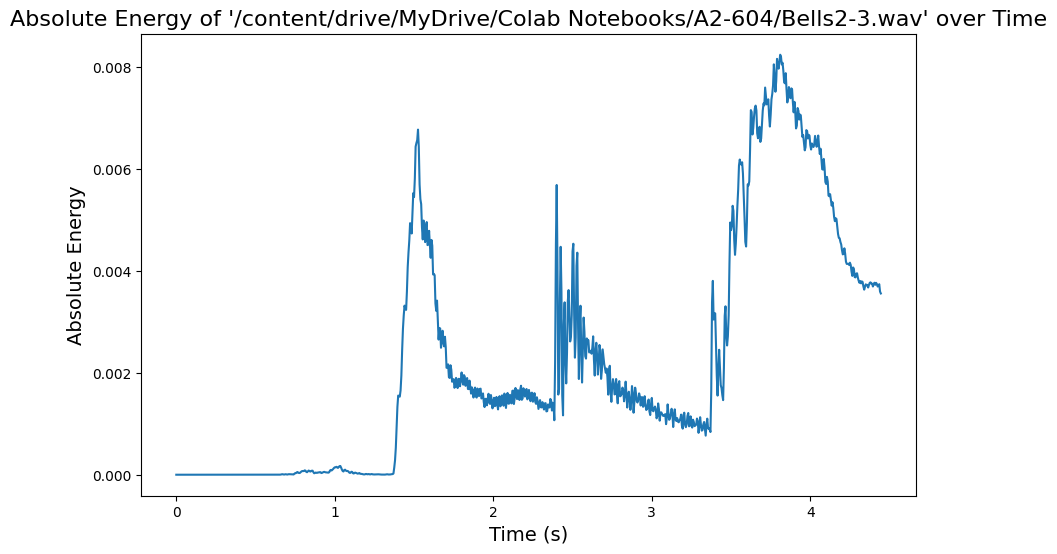

In [39]:
import numpy as np
import wave
import matplotlib.pyplot as plt

def calculate_absolute_energy_over_time(filename, window_size=0.01, hop_size=0.005):
  """Calculates and plots the absolute value of energy over time, also returning energy data for further calculations.

  Args:
      filename: Path to the audio file (WAV format).
      window_size: Size of the time window for energy calculation (seconds).
      hop_size: Amount to shift the window between calculations (seconds).

  Returns:
      time_steps: Array of time steps corresponding to the energy values.
      energy_values: Array of absolute energy values for each window.
  """
  with wave.open(filename, 'rb') as wav_file:
    sample_rate = wav_file.getframerate()
    num_frames = wav_file.getnframes()
    num_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()

    # Get audio data as NumPy array
    data = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

    # Normalize audio data to [-1, 1] range
    data = data / (2 ** (sample_width * 8 - 1))

    # Calculate number of windows and time steps
    num_windows = int(np.floor((num_frames / sample_rate - window_size) / hop_size) + 1)
    time_steps = np.linspace(0, (num_windows - 1) * hop_size, num_windows)

    # Initialize empty list for absolute energy values
    energy_values = []

    for i in range(num_windows):
      # Define window boundaries based on window size and hop size
      start_index = int(i * hop_size * sample_rate)
      end_index = int(min(start_index + window_size * sample_rate, num_frames))
      window_data = data[start_index:end_index]

      # Calculate absolute value of energy (assuming mono channel)
      energy = np.abs(np.sum(window_data ** 2)) / (end_index - start_index)
      energy_values.append(energy)

    # Plot time vs absolute energy (optional)
    plt.figure(figsize=(10, 6))
    plt.plot(time_steps, energy_values)
    plt.xlabel("Time (s)", fontsize=14)
    plt.ylabel("Absolute Energy", fontsize=14)
    plt.title(f"Absolute Energy of '{filename}' over Time", fontsize=16)
    # plt.show()  # Comment out to avoid showing the plot automatically

    return time_steps, energy_values

# Function for estimating total energy from energy vs time data (refer to previous explanation)
def estimate_energy_from_plot(time_data, energy_data):
  """Estimates total energy from absolute energy vs. time plot (using trapezoidal rule).

  Args:
      time_data: Array of time values from the plot (x-axis).
      energy_data: Array of absolute energy values from the plot (y-axis).

  Returns:
      Estimated total energy of the sound wave.
  """
  # Check if data lengths match
  if len(time_data) != len(energy_data):
    raise ValueError("Time and energy data lengths must match.")

  # Calculate time difference between samples (assuming uniform spacing)
  dt = time_data[1] - time_data[0]

  # Apply trapezoidal rule for numerical integration
  energy_sum = 0.0
  for i in range(1, len(energy_data)):
    energy_sum += (energy_data[i-1] + energy_data[i]) * dt / 2.0

  return energy_sum

# Example usage
filename = "/content/drive/MyDrive/Colab Notebooks/A2-604/Bells2-3.wav"
time_steps, energy_values = calculate_absolute_energy_over_time(filename)

# Now you can use the returned energy_values for further calculations
# (e.g., estimate total energy using numerical integration)

# Estimate total energy using trapezoidal rule
total_energy_estimate = estimate_energy_from_plot(time_steps, energy_values)
print(total_energy_estimate)

